In [1]:
# install.packages("sp")
# install.packages("rgdal")
# install.packages("rgeos")
# install.packages("tmap")
# install.packages("raster")
# install.packages("spdep")
# install.packages("gstat")
# install.packages("spgwr")
# install.packages("GWmodel")
# install.packages("regclass")
# install.packages("ggplot2")
# install.packages("ggcorrplot")
# install.packages("lmtest")
# install.packages("stringr")
# install.packages("leaflet")

library(sp)
library(dplyr)
library(stringr)
library(rgeos)
library(tmap)
library(raster)
library(spdep)
library(gstat)
library(spgwr)
library(GWmodel)
library(regclass)
library(ggplot2)
library(ggcorrplot)
library(lmtest)
library(leaflet)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


rgeos version: 0.5-3, (SVN revision 634)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Linking to sp version: 1.4-2 
 Polygon checking: TRUE 



Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Loading required package: sf

Linking to GEOS 3.8.0, GDAL 3.1.2, PROJ 6.1.0

NOTE: This package does not constitute approval of GWR
as a method of spatial analysis; see example(gwr)

Loading required package: maptools

Checking rgeos availability: TRUE

Loading required package: robustbase

Loading required package: Rcpp

Loading required package: spat

## 현재까지 구축한 데이터 불러오기

데이터의 양이 충분하지 않는 '중앙분리대수' 변수는 제외하기

In [2]:
acci_count_filter25 <- read.csv("accident_count_filter_25.csv" ) %>% dplyr::select(-중앙분리대수)
dim(acci_count_filter25)
names(acci_count_filter25)[2:48]
acci_count_filter25 %>% head(1)

[1] 5556   48

[1] "gid"                          "acci_cnt"                    
 [3] "geometry"                     "사고건수"                    
 [5] "사상자수"                     "x"                           
 [7] "y"                            "신호등_보행자수"             
 [9] "신호등_차량등수"              "cctv수"                      
[11] "혼잡빈도강도"                 "혼잡시간강도"                
[13] "전체_추정교통량"              "이상평균기온동반사고건수"    
[15] "이상최저온도동반사고건수"     "이상최고온도동반사고건수"    
[17] "이상최대풍속동반사고건수"     "이상평균풍속동반사고건수"    
[19] "이상평균습도동반사고건수"     "이상평균지면온도동반사고건수"
[21] "이상강수량동반사고건수"       "이상적설량동반사고건수"      
[23] "이상안개시간동반사고건수"     "안전지대수"                  
[25] "정차금지지대수"               "도로속도표시수"              
[27] "교통안전표지수"               "노드개수"                    
[29] "횡단보도수"                   "건물면적"                    
[31] "자동차대수"                   "총거주인구수"                
[33] "차대사람..20대"               "차대사람..20대.미만"         
[35] "차대사람..30대"               "차대사람..40대"              
[37] "차대사람..50대"               "차대사람..60대.이상"         
[39] "차대차..20대"                 "차대차..20대.미만"           
[41] "차대차..30대"                 "차대차..40대"                
[43] "차대차..50대"                 "차대차..60대.이상"           
[45] "사망자수"                     "경상자수"                    
[47] "중상자수"

,X,gid,acci_cnt,geometry,사고건수,사상자수,x,y,신호등_보행자수,신호등_차량등수,⋯,차대사람..60대.이상,차대차..20대,차대차..20대.미만,차대차..30대,차대차..40대,차대차..50대,차대차..60대.이상,사망자수,경상자수,중상자수
,<int>,<fct>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,다바931203,2,"MULTIPOLYGON (((127.4230710131166 36.38013455218083, 127.4230701251944 36.38103608833949, 127.4241850500282 36.38103680113275, 127.424185925082 36.38013526495075, 127.4230710131166 36.38013455218083)))",2,2,127.4236,36.38059,1,3,⋯,1,0,0,0,1,0,0,0,1,1


In [3]:
for(i in 34:47){
    print(table(acci_count_filter25[, i]))
}


   0    1    2    3    4    7    8    9   22   37   41 
5154  329   51   13    2    1    2    1    1    1    1 

   0    1    2    3    4    6   11 
5101  399   46    6    2    1    1 

   0    1    2    3    4    5 
5236  285   31    2    1    1 

   0    1    2    3    4 
5146  370   35    4    1 

   0    1    2    3    5 
5050  435   62    8    1 

   0    1    2    3    4    5    6 
4656  729  124   37    5    4    1 

   0    1    2    3    4    5    6    7    8    9   10   11   14 
4103  932  296  112   50   24   16   11    5    2    3    1    1 

   0    1    2    3    4 
5260  262   32    1    1 

   0    1    2    3    4    5    6    7    8    9   10   11   12   14   16 
3805 1074  358  143   75   46   16   17    6    6    4    2    1    2    1 

   0    1    2    3    4    5    6    7    8    9   10   11   13   14 
3734 1099  382  165   67   41   25   15   12    7    2    4    2    1 

   0    1    2    3    4    5    6    7    8    9   10   12   14   15   17   20 
3760 104

다양한 방식으로 사고건수가 0인 격자를 제거했지만, **연령과 사고유형으로 나눈 그룹 안에서는 여전히 0의 개수가 많이 있는 것을 확인**했다.<br/>
따라서 앞서 사용했던 국지적 모란 방식을 통해서 다시 한번 의미성이 떨어지는 0개 사고건수 격자를 제외하는 방법을 수행하도록 한다.

## 25. 국지적 모란 방식을 이용하여 각 그룹별로 의미성이 떨어지는 0개 사고건수 격자를 제외하기

In [4]:
local_moran_func <- function(target_group){
  
  ## target_group에 해당하는 변수의 index를 target_col로 할당
  for(i in 34:47){
    if (names(acci_count_filter25[i]) == target_group){
      target_col = i
    }
  }
  
  ## target_group 그룹을 종속변수로 둔 데이터를 필터링
  spdep::set.ZeroPolicyOption(TRUE)
  distt <- spdep::dnearneigh(cbind(acci_count_filter25$x, acci_count_filter25$y), 0, 0.25, longlat=TRUE)
  lw2 <- spdep::nb2listw(distt, style="W", zero.policy=TRUE)
  om <- spdep::localmoran(acci_count_filter25[, target_col], lw2,zero.policy = TRUE)
  pr2 <- data.frame(cbind(om[,1], (acci_count_filter25[, target_col] - mean(acci_count_filter25[, target_col], na.rm = TRUE)) / sd(acci_count_filter25[, target_col], na.rm=T)))
  plot(pr2$X1, pr2$X2, xlab="Local Moran's I", ylab="Standardized number of accidents")
  abline(v=0, h=0, col="red")
  pr3 <- pr2 %>% filter(!X1>0 | !X2<0) # 4사분면 제외
  
  ## 분석에 사용할 최종 데이터(target_group을 종속변수로 둔 모델) 구축 완료
  group_df <- acci_count_filter25[rownames(pr3), ]
  
  ## 각 그룹에 맞춘 최종 데이터와 기존 데이터에 대하여 대전시 내의 산포와 비교
  print(table(acci_count_filter25[, target_col])) # 기존 데이터
  print(table(group_df[, target_col]))            # 새롭게 필터링한 데이터
  plot(acci_count_filter25$x, acci_count_filter25$y, xlab="long", ylab="lat", main="Comparison of former and new data")
  lines(group_df$x, group_df$y, col="green", pch=19, cex = 0.5, type="p")
    
  return(group_df)
}

#### 차대사람_20대 group에 대한 결과


   0    1    2    3    4    7    8    9   22   37   41 
5154  329   51   13    2    1    2    1    1    1    1 

   0    1    2    3    4    7    8    9   22   37   41 
1356  329   51   13    2    1    2    1    1    1    1 


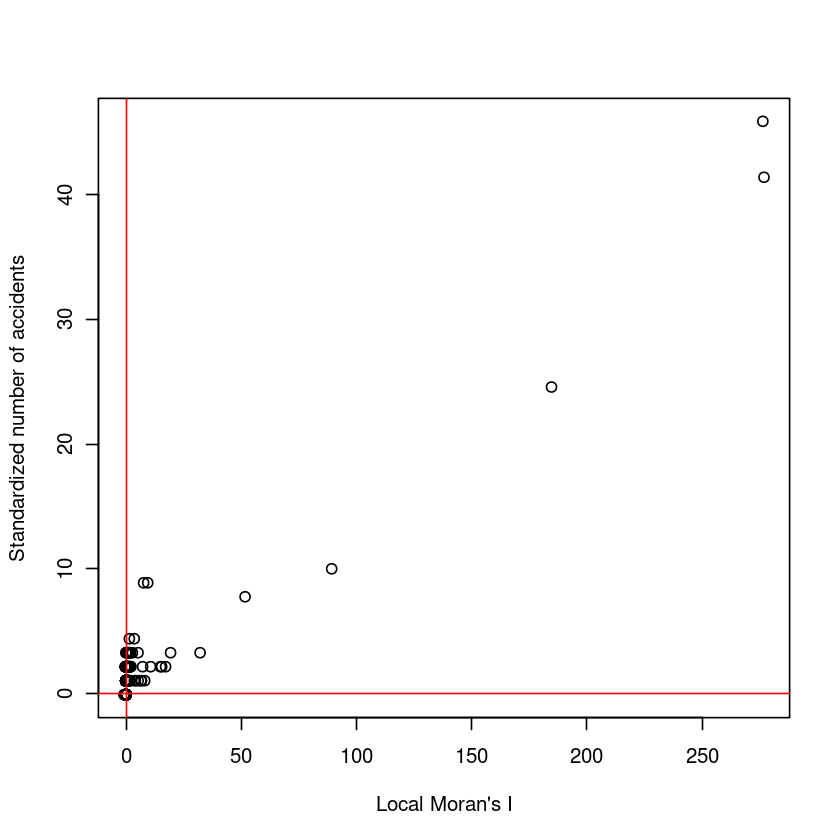

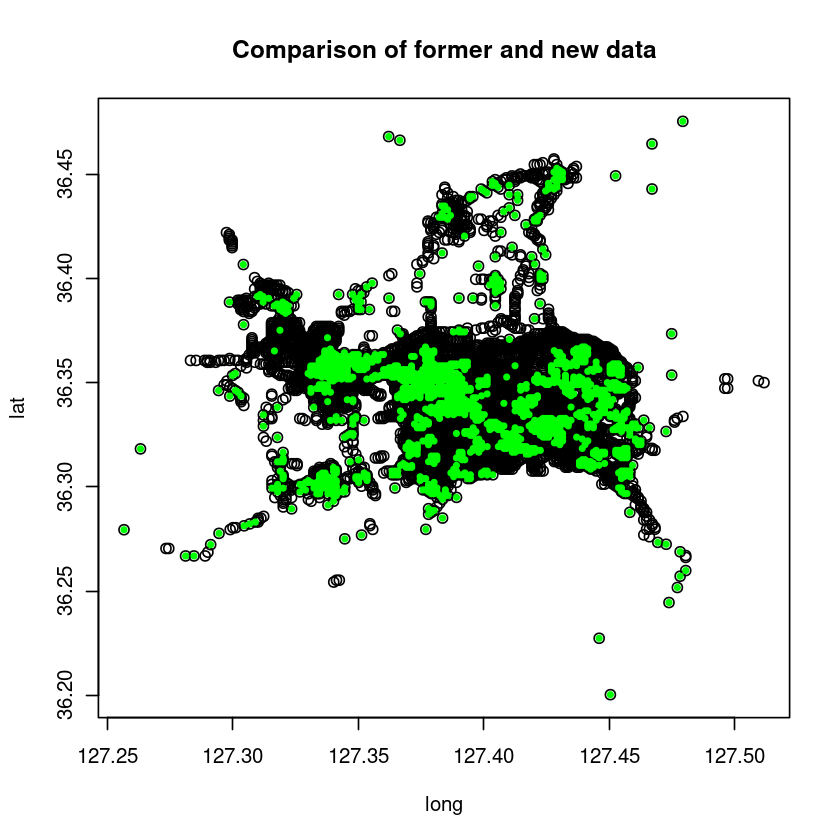

In [5]:
person_20 <- local_moran_func('차대사람..20대')
write.csv(person_20, 'person_20.csv')

#### 차대사람_20대 미만 group에 대한 결과


   0    1    2    3    4    6   11 
5101  399   46    6    2    1    1 

   0    1    2    3    4    6   11 
1751  399   46    6    2    1    1 


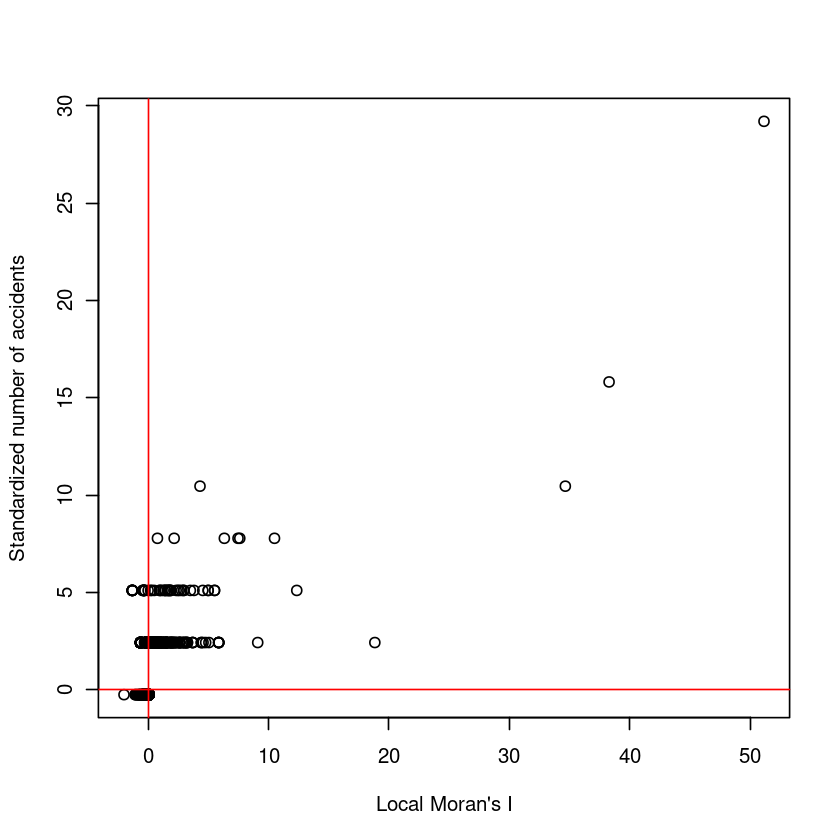

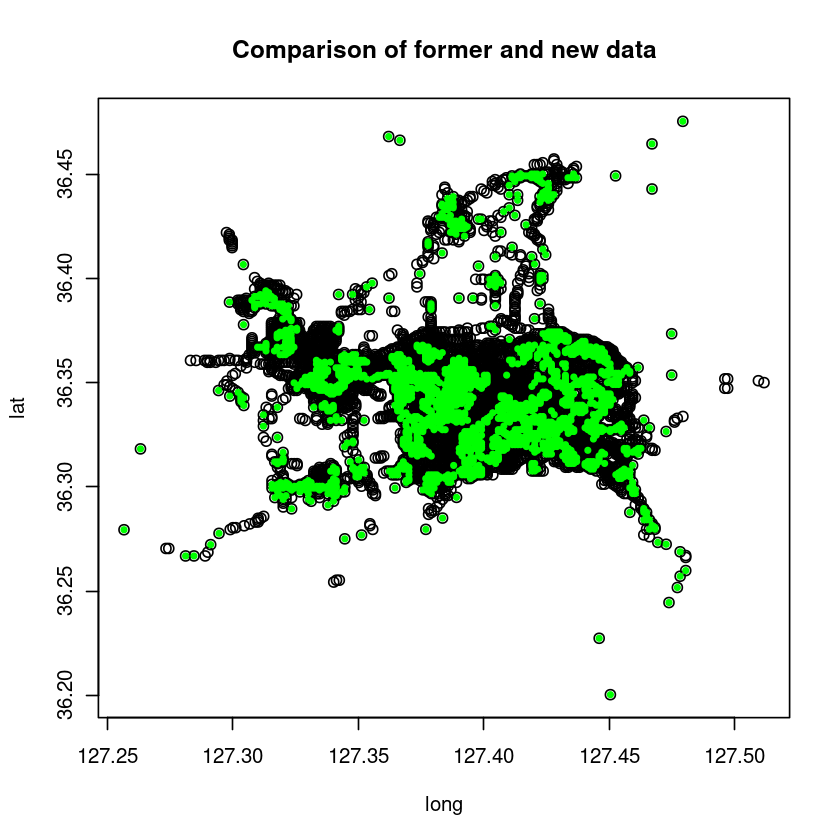

In [6]:
person_under20 <- local_moran_func('차대사람..20대.미만')
write.csv(person_under20, 'person_under20.csv')

#### 차대사람_30대 group에 대한 결과


   0    1    2    3    4    5 
5236  285   31    2    1    1 

   0    1    2    3    4    5 
1793  285   31    2    1    1 


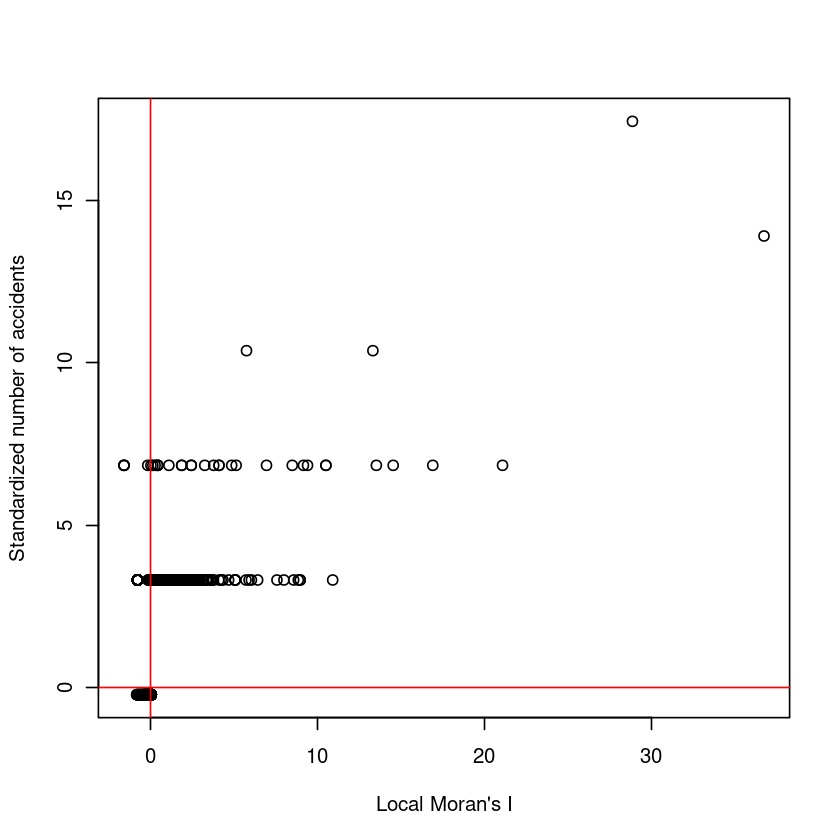

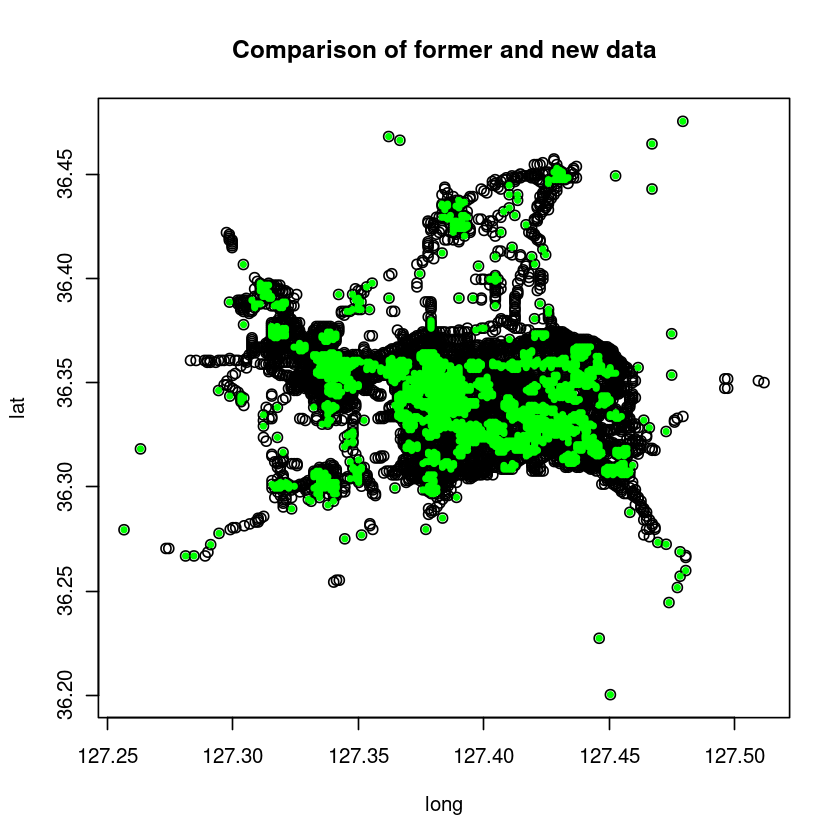

In [7]:
person_30 <- local_moran_func('차대사람..30대')
write.csv(person_30, 'person_30.csv')

#### 차대사람_40대 group에 대한 결과


   0    1    2    3    4 
5146  370   35    4    1 

   0    1    2    3    4 
1910  370   35    4    1 


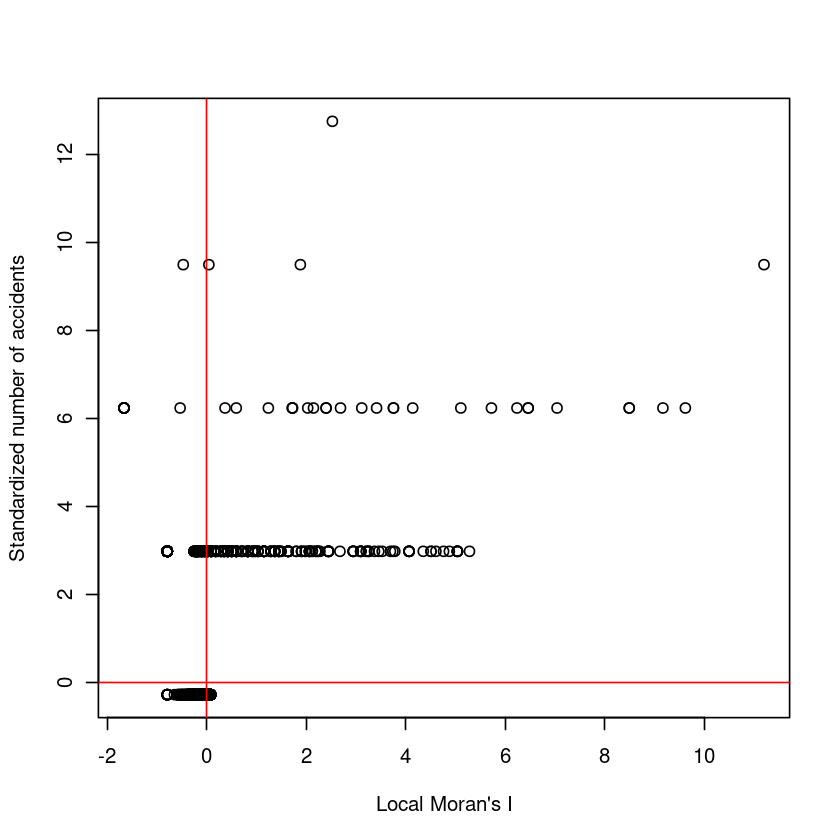

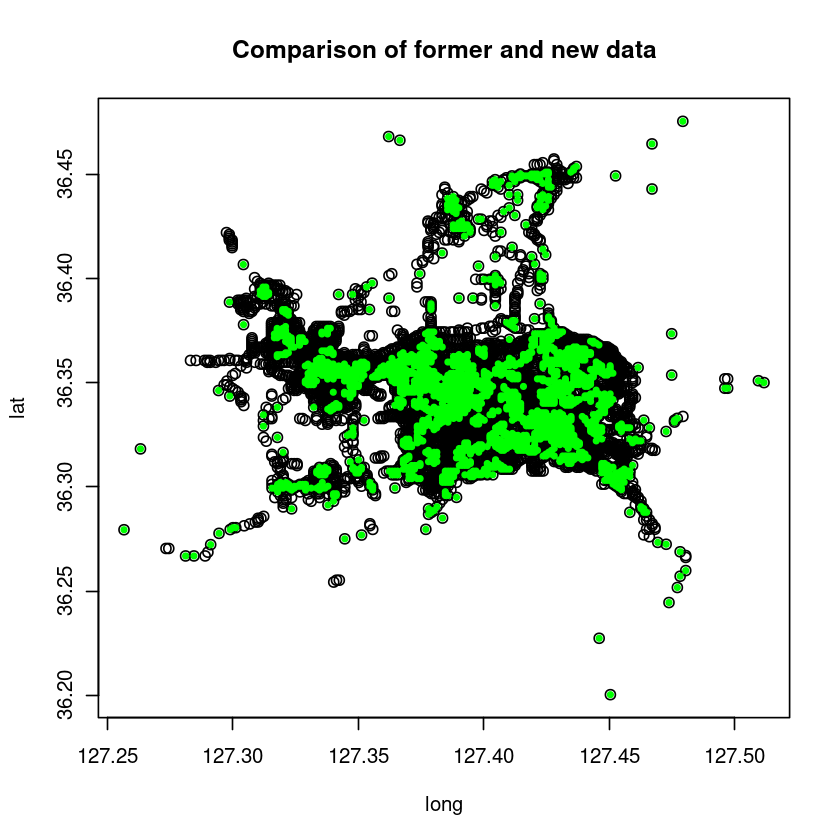

In [8]:
person_40 <- local_moran_func('차대사람..40대')
write.csv(person_40, 'person_40.csv')

#### 차대사람_50대 group에 대한 결과


   0    1    2    3    5 
5050  435   62    8    1 

   0    1    2    3    5 
1907  435   62    8    1 


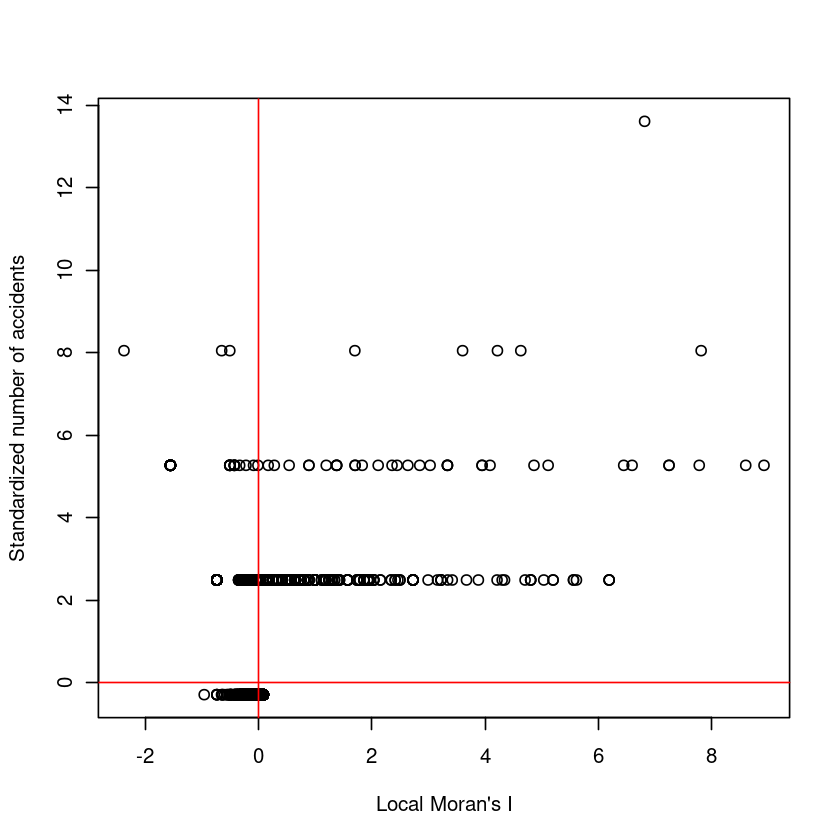

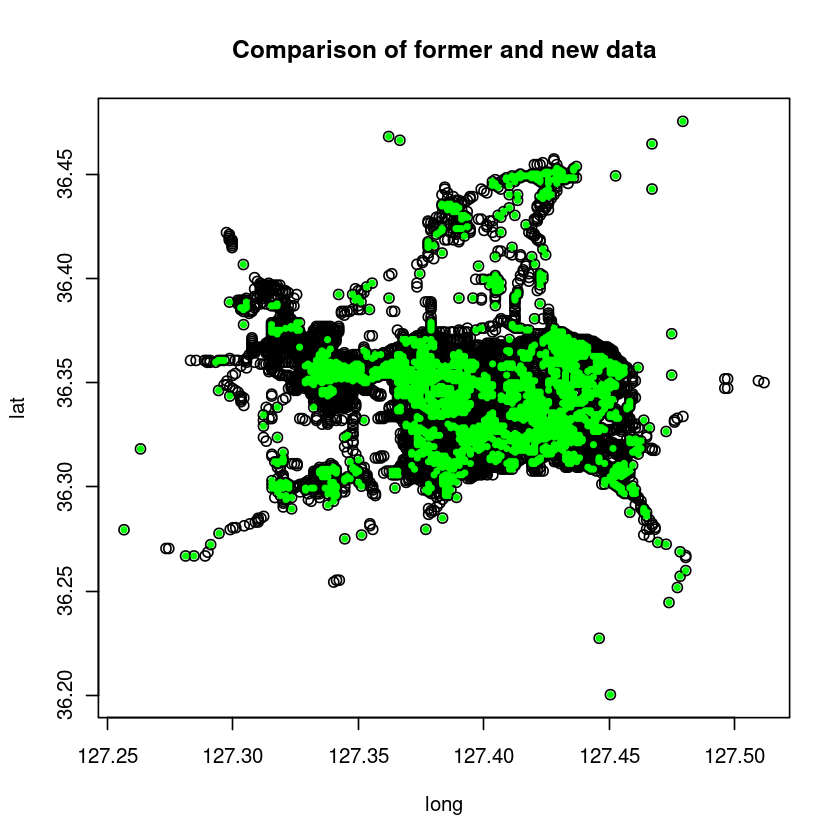

In [9]:
person_50 <- local_moran_func('차대사람..50대')
write.csv(person_50, 'person_50.csv')

#### 차대사람_60대 이상 group에 대한 결과


   0    1    2    3    4    5    6 
4656  729  124   37    5    4    1 

   0    1    2    3    4    5    6 
1672  729  124   37    5    4    1 


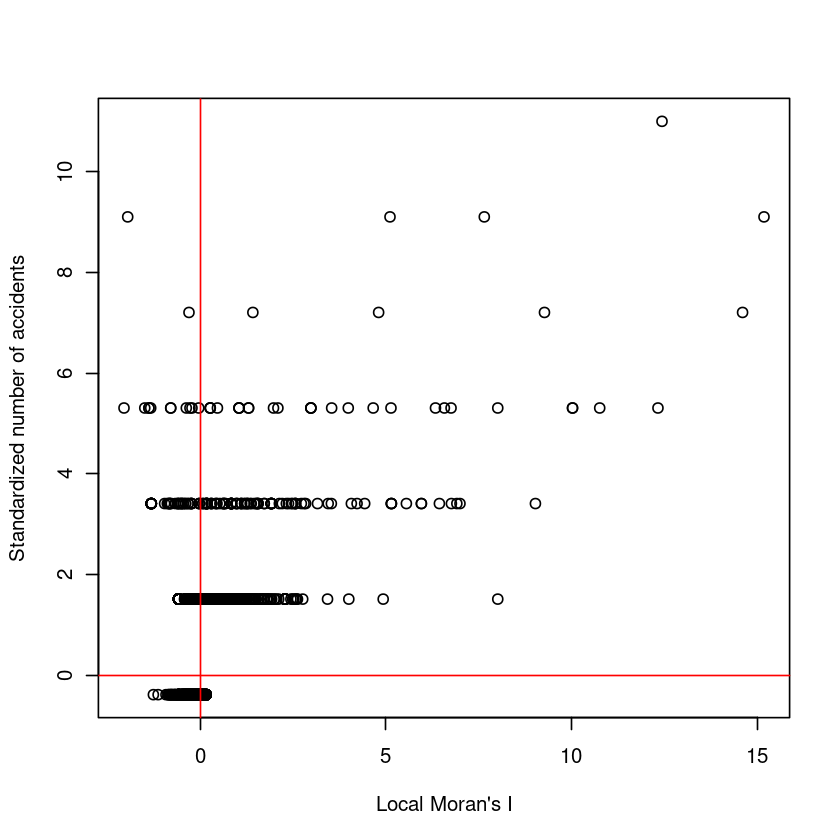

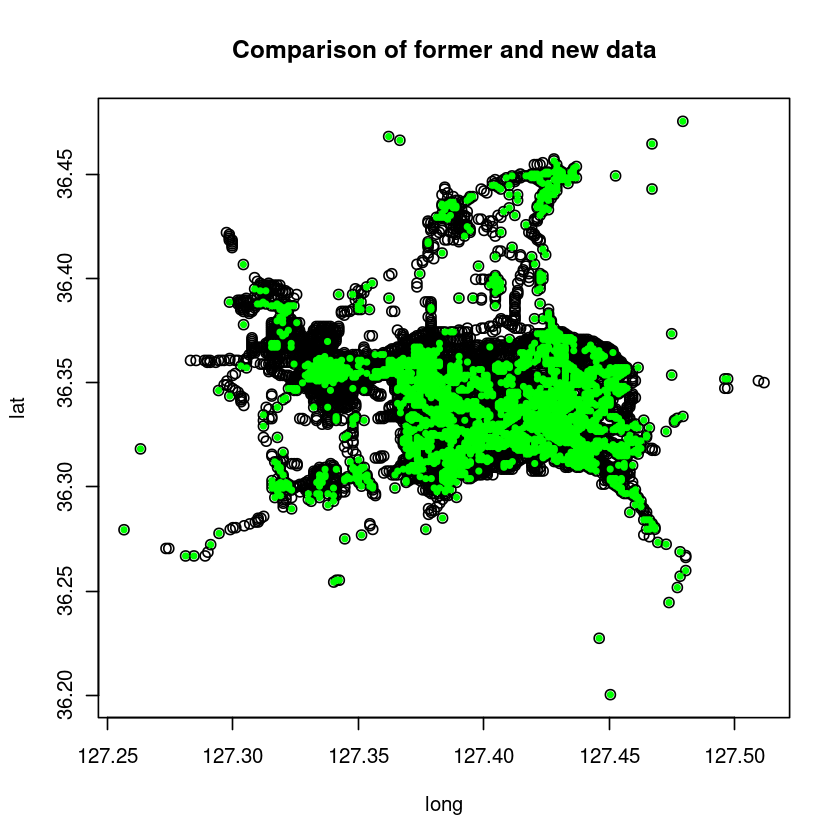

In [10]:
person_over60 <- local_moran_func('차대사람..60대.이상')
write.csv(person_over60, 'person_over60.csv')

#### 차대차_20대 group에 대한 결과


   0    1    2    3    4    5    6    7    8    9   10   11   14 
4103  932  296  112   50   24   16   11    5    2    3    1    1 

   0    1    2    3    4    5    6    7    8    9   10   11   14 
1431  932  296  112   50   24   16   11    5    2    3    1    1 


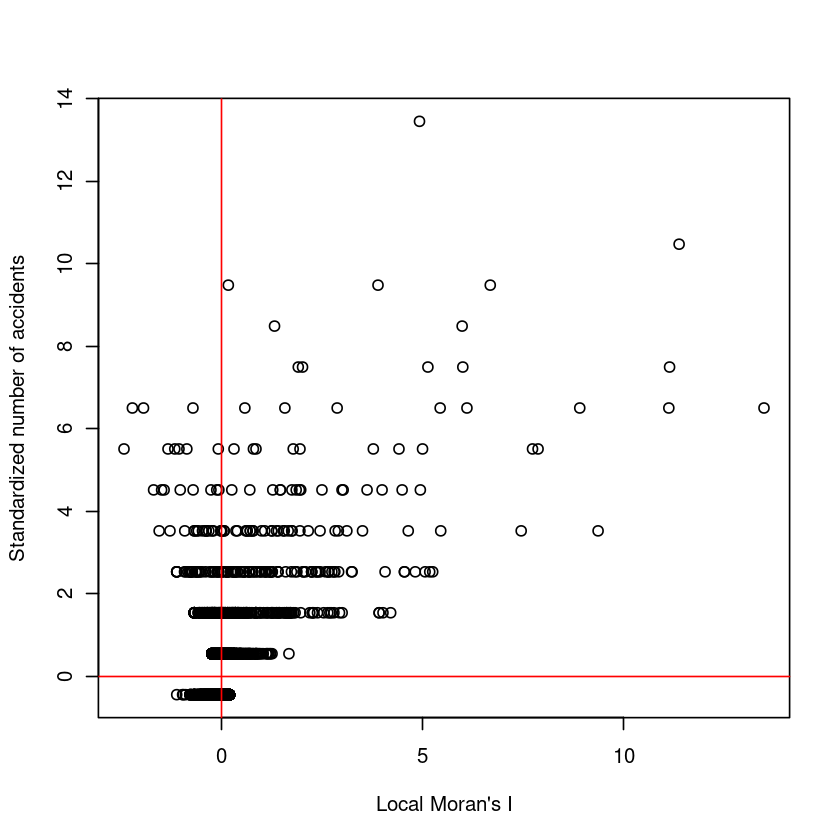

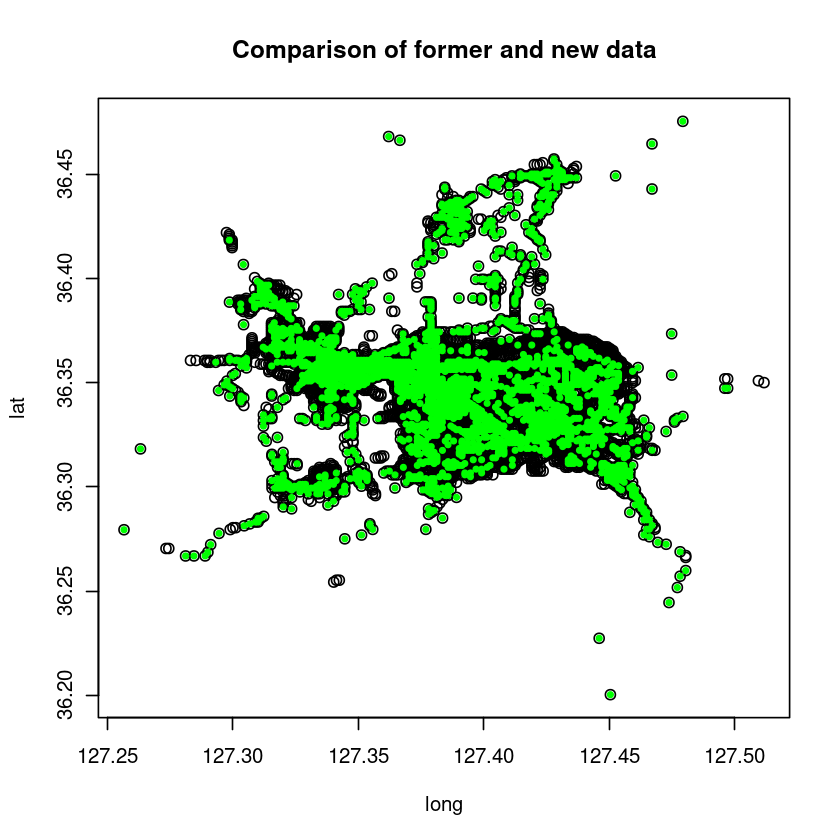

In [11]:
car_20 <- local_moran_func('차대차..20대')
write.csv(car_20, 'car_20.csv')

#### 차대차_20대 미만 group에 대한 결과


   0    1    2    3    4 
5260  262   32    1    1 

   0    1    2    3    4 
2060  262   32    1    1 


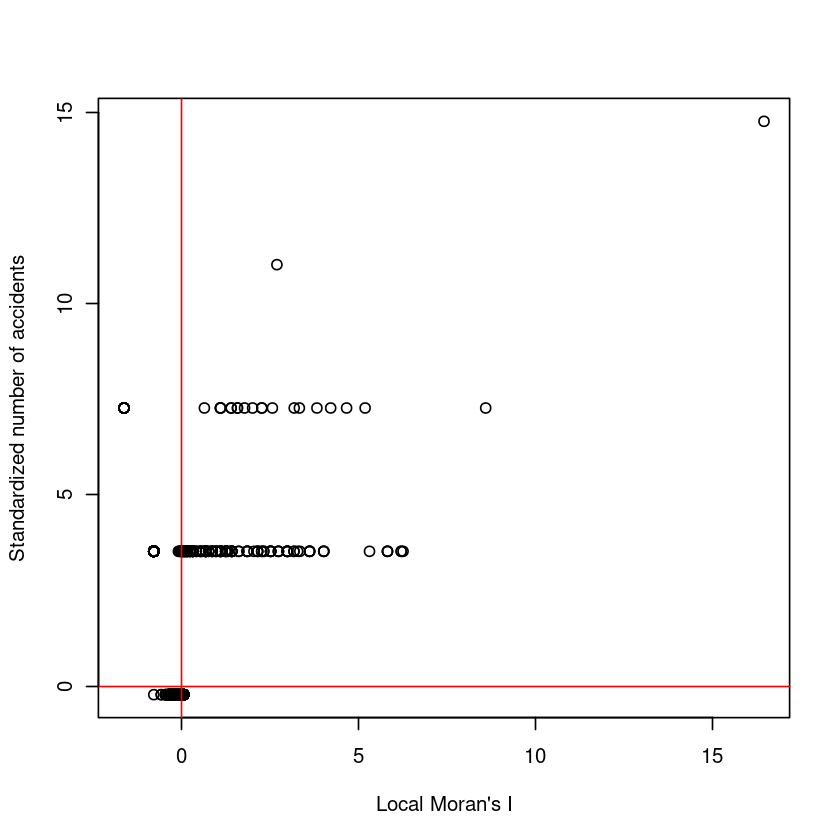

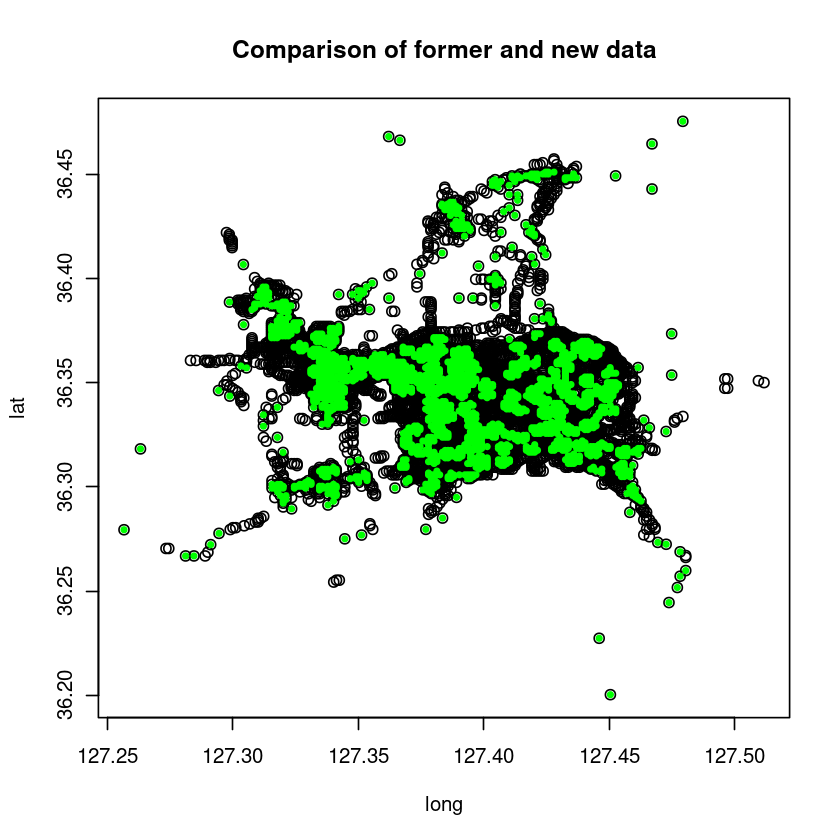

In [12]:
car_under20 <- local_moran_func('차대차..20대.미만')
write.csv(car_under20, 'car_under20.csv')

#### 차대차_30대 group에 대한 결과


   0    1    2    3    4    5    6    7    8    9   10   11   12   14   16 
3805 1074  358  143   75   46   16   17    6    6    4    2    1    2    1 

   0    1    2    3    4    5    6    7    8    9   10   11   12   14   16 
1205 1074  358  143   75   46   16   17    6    6    4    2    1    2    1 


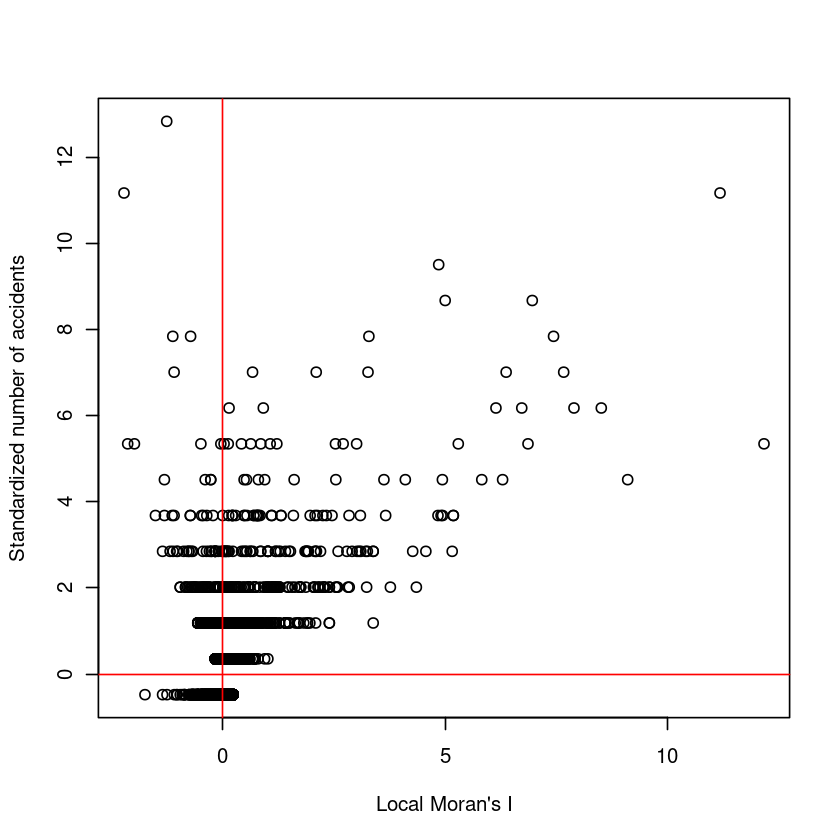

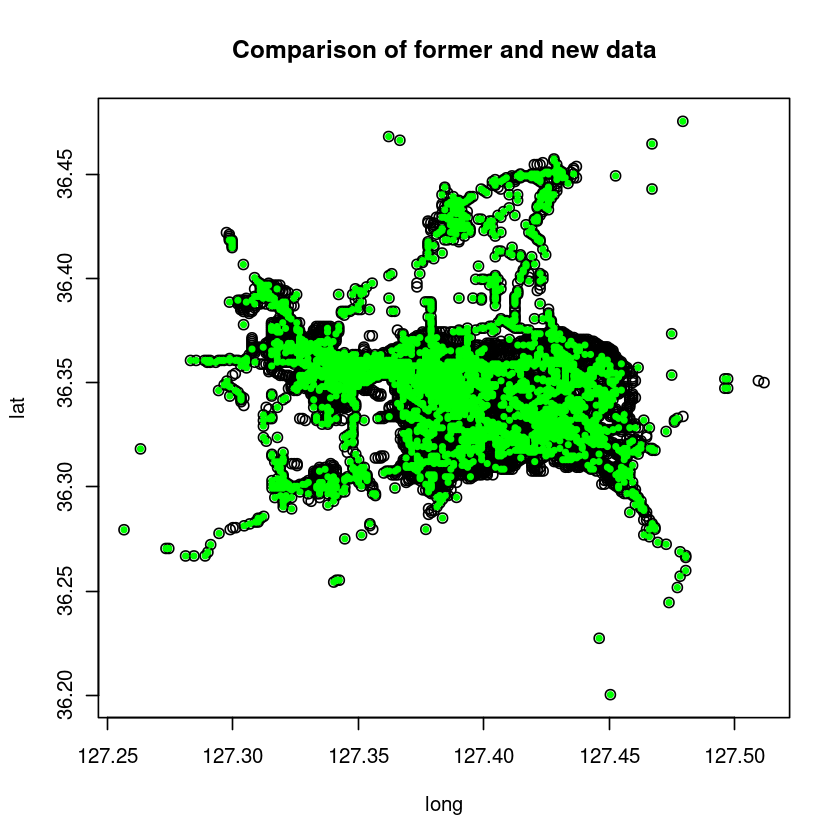

In [13]:
car_30 <- local_moran_func('차대차..30대')
write.csv(car_30, 'car_30.csv')

#### 차대차_40대 group에 대한 결과


   0    1    2    3    4    5    6    7    8    9   10   11   13   14 
3734 1099  382  165   67   41   25   15   12    7    2    4    2    1 

   0    1    2    3    4    5    6    7    8    9   10   11   13   14 
1264 1099  382  165   67   41   25   15   12    7    2    4    2    1 


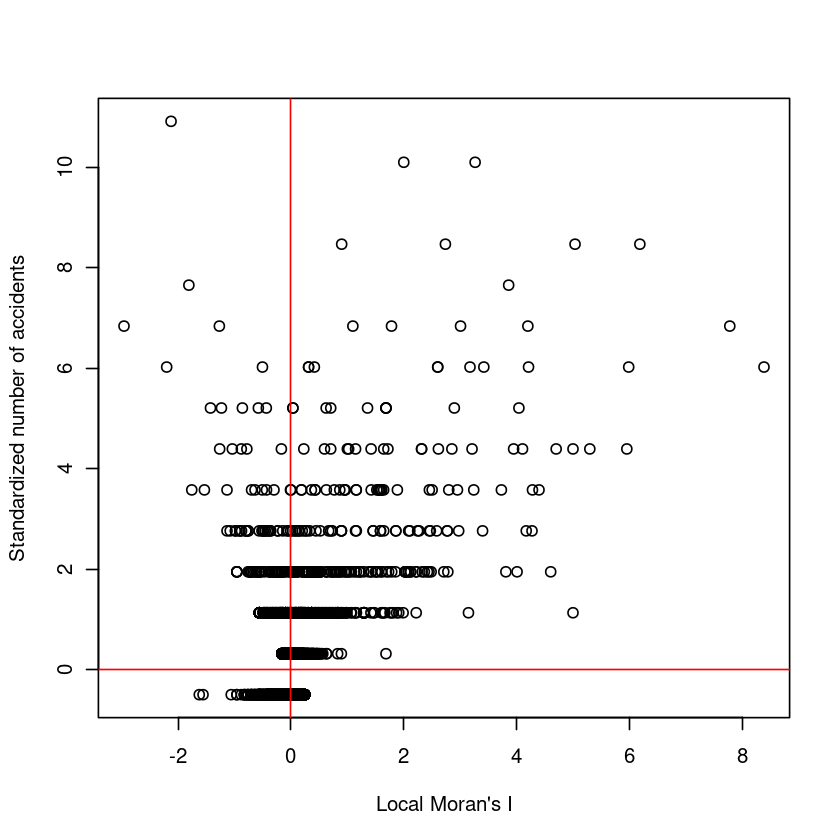

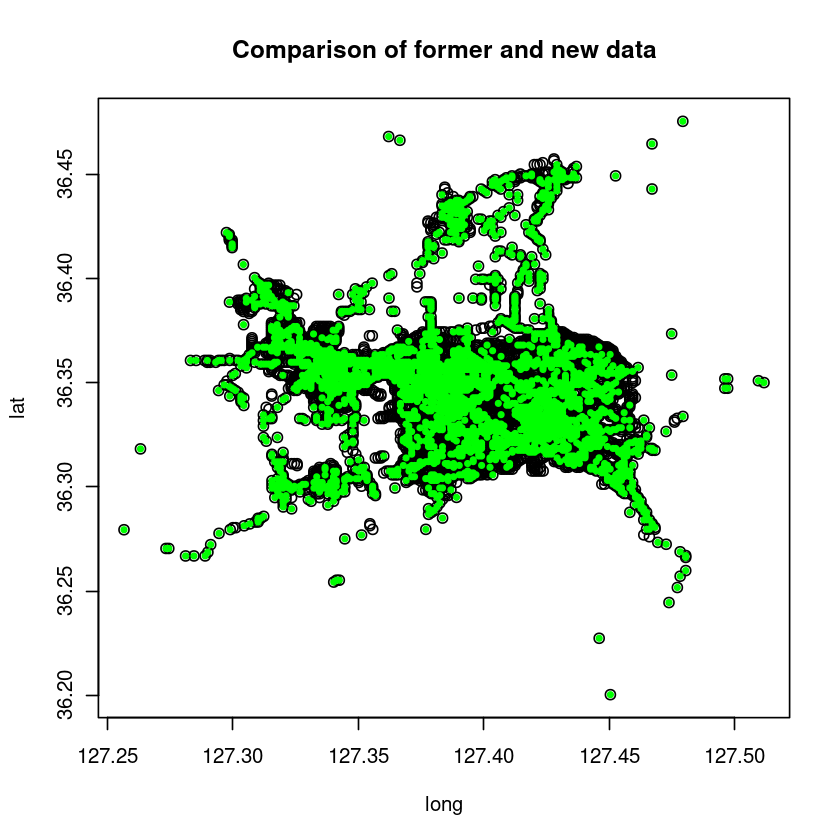

In [14]:
car_40 <- local_moran_func('차대차..40대')
write.csv(car_40, 'car_40.csv')

#### 차대차_50대 group에 대한 결과


   0    1    2    3    4    5    6    7    8    9   10   12   14   15   17   20 
3760 1043  400  170   77   29   26   13   14    9    4    2    2    5    1    1 

   0    1    2    3    4    5    6    7    8    9   10   12   14   15   17   20 
1321 1043  400  170   77   29   26   13   14    9    4    2    2    5    1    1 


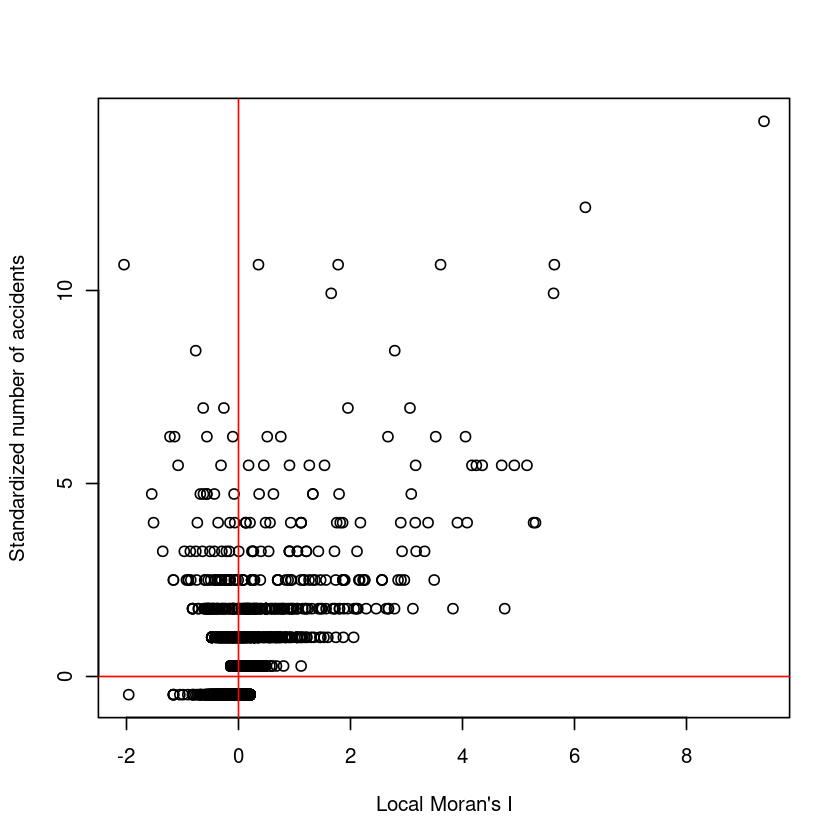

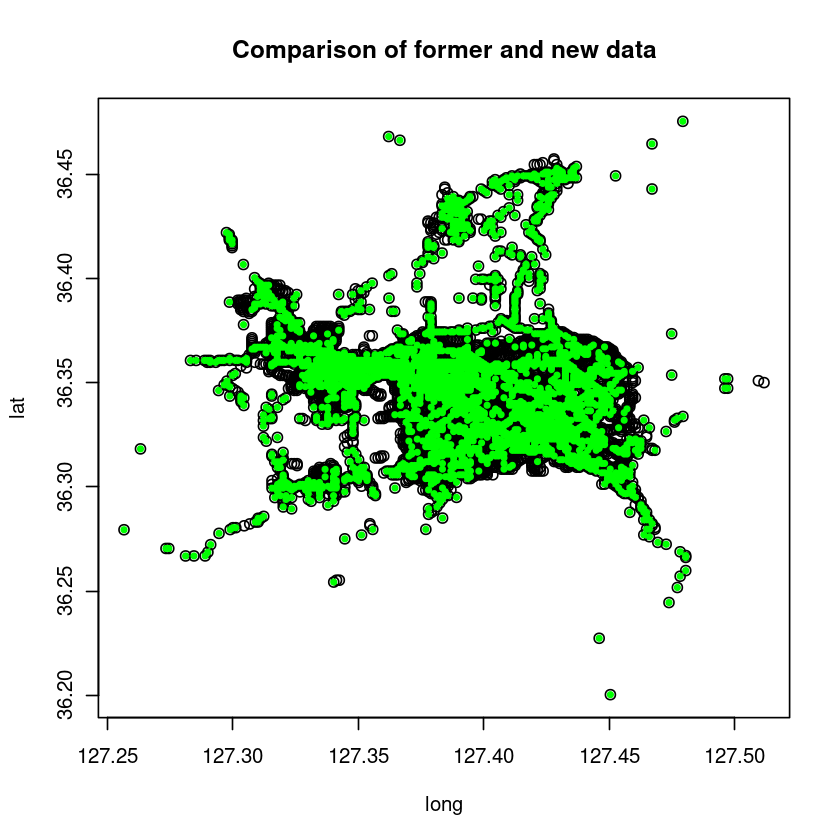

In [15]:
car_50 <- local_moran_func('차대차..50대')
write.csv(car_50, 'car_50.csv')

#### 차대차_60대 이상 group에 대한 결과


   0    1    2    3    4    5    6    7    8    9   10   11   12   14 
3978  983  340  122   52   34   16   13    5    5    3    2    2    1 

   0    1    2    3    4    5    6    7    8    9   10   11   12   14 
1561  983  340  122   52   34   16   13    5    5    3    2    2    1 


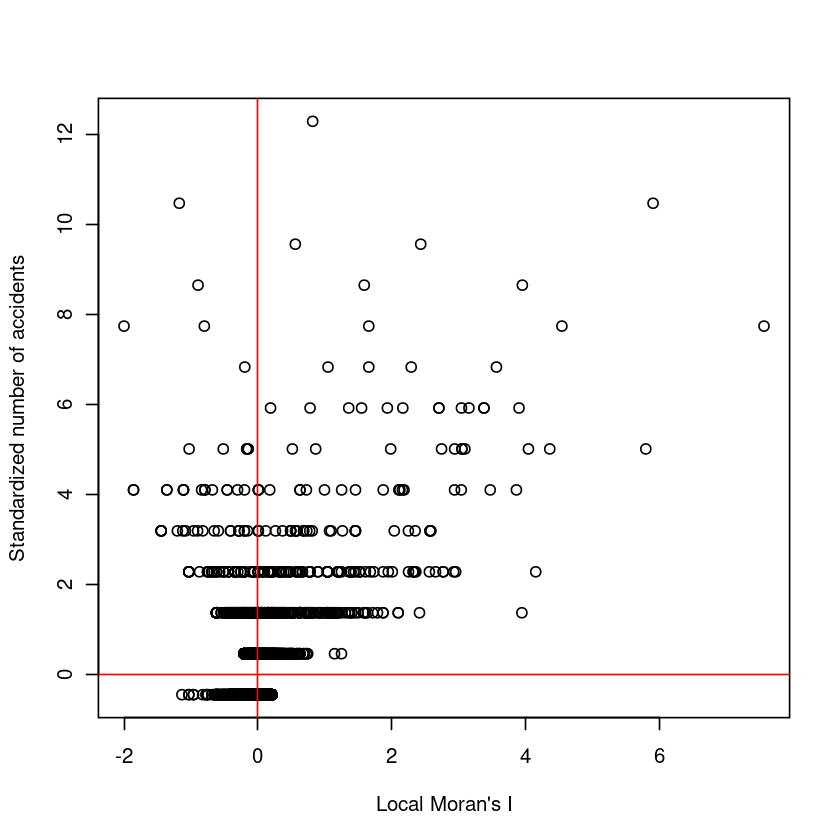

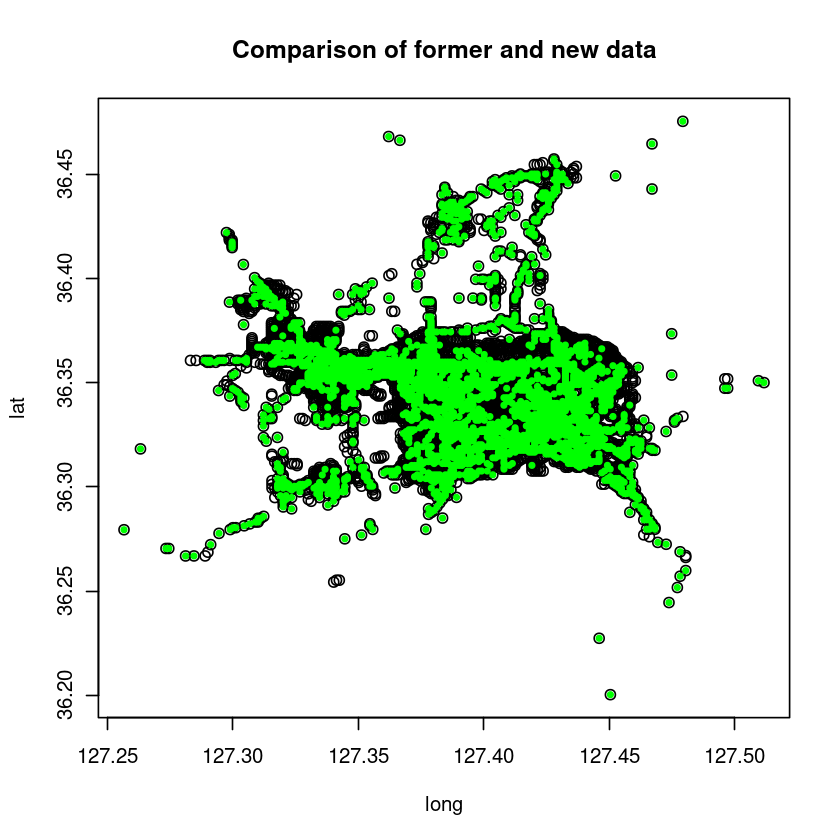

In [16]:
car_over60 <- local_moran_func('차대차..60대.이상')
write.csv(car_over60, 'car_over60.csv')

## 26. 사망자수와 중상자 및 사망자 수에 따른 가중치 도출 - 범주형 회귀분석

In [17]:
accident_list <- read.csv("1.대전광역시_교통사고내역(2017~2019).csv", header=TRUE)
dim(accident_list)
accident_list$피해운전자.연령대 <- as.factor(accident_list$피해운전자.연령대)
table(accident_list$피해운전자.연령대)
levels(accident_list$`피해운전자.연령대`) <- c("20대미만", "20대미만", "20대", "30대", "40대", "50대", "60대이상", "60대이상", "60대이상", "60대이상", "NULL", "미분류")

[1] 23652    16


    10대 10대미만     20대     30대     40대     50대     60대     70대 
     849      248     3699     4211     4526     4766     3086     1202 
    80대     90대     NULL   미분류 
     298       20      671       76 

In [18]:
accident_list <- accident_list %>% filter(피해운전자.연령대!="NULL" & 피해운전자.연령대!="미분류")
dim(accident_list)
table(accident_list$피해운전자.연령대)

[1] 22905    16


20대미만     20대     30대     40대     50대 60대이상     NULL   미분류 
    1097     3699     4211     4526     4766     4606        0        0 

In [19]:
accident_list$`사고유형` <- substr(accident_list$'사고유형', 1, 5)
accident_list$`사고유형` <- str_replace_all(accident_list$`사고유형`, " -", "")
accident_list$`사고유형` <- str_replace_all(accident_list$`사고유형`, " ", "")
accident_list$`사고유형` <- as.factor(accident_list$`사고유형`)
table(accident_list$`사고유형`)

accident_list$사상자수 <- accident_list$`사망자수` + accident_list$`중상자수` + accident_list$`경상자수`
accident_list$중상이상사상자수 <- accident_list$`사망자수` + accident_list$`중상자수`
accident_list %>% head(3)


차대사람   차대차 
    4683    18222 

,사고일,시군구,사고유형,법규위반,사고내용,사망자수,중상자수,경상자수,부상신고자수,가해운전자.차종,가해운전자.연령대,가해운전자.성별,피해운전자.차종,피해운전자.연령대,피해운전자.성별,gid,사상자수,중상이상사상자수
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,2017-01-01,대전광역시 서구 용문동,차대차,안전운전불이행,중상사고,0,1,1,0,승용,50대,남,승용,60대이상,남,다바905151,2,1
2,2017-01-01,대전광역시 서구 탄방동,차대차,안전운전불이행,경상사고,0,0,1,0,승용,50대,남,승용,30대,남,다바905166,1,0
3,2017-01-01,대전광역시 서구 둔산동,차대사람,안전운전불이행,중상사고,0,1,0,0,승용,30대,남,보행자,20대미만,여,다바888169,1,1


In [20]:
acci_num_glm <- glm(사상자수 ~ 사고유형 + 피해운전자.연령대 + 사고유형:피해운전자.연령대, family="poisson", accident_list)
summary(acci_num_glm)
accident_list$pred <- acci_num_glm$fitted.values
unique(acci_num_glm$fitted.values)


Call:
glm(formula = 사상자수 ~ 사고유형 + 피해운전자.연령대 + 
    사고유형:피해운전자.연령대, family = "poisson", 
    data = accident_list)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8030  -0.5231  -0.4678   0.2876   9.8965  

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -0.001476   0.038433  -0.038 0.969365
사고유형차대차                            0.188164   0.058799   3.200 0.001374
피해운전자.연령대20대                     0.016022   0.051773   0.309 0.756972
피해운전자.연령대30대                     0.039216   0.059453   0.660 0.509502
피해운전자.연령대40대                     0.065790   0.056219   1.170 0.241904
피해운전자.연령대50대                    -0.001227   0.053200  -0.023 0.981604
피해운전자.연령대60대이상                -0.002758   0.046737  -0.059 0.952938
사고유형차대차:피해운전자.연령대20대      0.231280   0.069897   3.309 0.000937
사고유형차대차:피해운전자.연령대30대      0.256743   0.075364   3.407 0.000658
사고유형차대차:피해운전자.연령대40대      0.228738   0.072777   3.14

[1] 1.5925926 1.6203580 0.9985251 1.6180398 1.6253416 1.0664273 0.9957746
 [8] 0.9973009 1.5434028 1.0146520 1.0384615 1.2052506

In [21]:
serious_acci_num_glm <- glm(중상이상사상자수 ~ 사고유형 + 피해운전자.연령대 + 사고유형:피해운전자.연령대, family="poisson", accident_list)
summary(serious_acci_num_glm)
accident_list$pred_jungsang <- serious_acci_num_glm$fitted.values
unique(serious_acci_num_glm$fitted.values)


Call:
glm(formula = 중상이상사상자수 ~ 사고유형 + 피해운전자.연령대 + 
    사고유형:피해운전자.연령대, family = "poisson", 
    data = accident_list)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1044  -0.7017  -0.6537  -0.6125  10.5031  

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -1.21088    0.07036 -17.210  < 2e-16
사고유형차대차                           -0.05631    0.11587  -0.486 0.626994
피해운전자.연령대20대                    -0.33242    0.10327  -3.219 0.001287
피해운전자.연령대30대                     0.02526    0.10929   0.231 0.817238
피해운전자.연령대40대                     0.28194    0.09745   2.893 0.003812
피해운전자.연령대50대                     0.35545    0.09014   3.943 8.03e-05
피해운전자.연령대60대이상                 0.71635    0.07814   9.168  < 2e-16
사고유형차대차:피해운전자.연령대20대     -0.06332    0.14481  -0.437 0.661919
사고유형차대차:피해운전자.연령대30대     -0.43178    0.14779  -2.922 0.003483
사고유형차대차:피해운전자.연령대40대     -0.51431    0.13820  -3.721 0.000

[1] 0.3166981 0.1875501 0.2979351 0.2232300 0.2462112 0.3949731 0.6098592
 [8] 0.4251012 0.1895833 0.2136752 0.3055556 0.2816229

In [22]:
accident_list$weights <- accident_list$pred / sum(unique(accident_list$pred)) #사상자수 가중치(규모)
accident_list$weights_jungsang <- accident_list$pred_jungsang / sum(unique(accident_list$pred_jungsang)) #중상자이상수 가중치(신체적 손상, 심각성)
accident_list$total_weight <- (accident_list$weights + accident_list$weights_jungsang) / sum(unique(accident_list$weights + accident_list$weights_jungsang))
dim(accident_list)
accident_list %>% head(3)

[1] 22905    23

,사고일,시군구,사고유형,법규위반,사고내용,사망자수,중상자수,경상자수,부상신고자수,가해운전자.차종,⋯,피해운전자.연령대,피해운전자.성별,gid,사상자수,중상이상사상자수,pred,pred_jungsang,weights,weights_jungsang,total_weight
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017-01-01,대전광역시 서구 용문동,차대차,안전운전불이행,중상사고,0,1,1,0,승용,⋯,60대이상,남,다바905151,2,1,1.5925926,0.3166981,0.10398142,0.08577966,0.09488054
2,2017-01-01,대전광역시 서구 탄방동,차대차,안전운전불이행,경상사고,0,0,1,0,승용,⋯,30대,남,다바905166,1,0,1.6203580,0.1875501,0.10579424,0.05079912,0.07829668
3,2017-01-01,대전광역시 서구 둔산동,차대사람,안전운전불이행,중상사고,0,1,0,0,승용,⋯,20대미만,여,다바888169,1,1,0.9985251,0.2979351,0.06519436,0.08069759,0.07294598


In [23]:
accident_list$사고유형_연령대 <- paste0(accident_list$`사고유형`, "_", accident_list$`피해운전자.연령대`)
table(accident_list$사고유형_연령대)
n <- aggregate(total_weight ~ `사고유형_연령대`, mean, data=accident_list)
weight_df <- n[order(n$total_weight, decreasing = T),]
weight_df


    차대사람_20대 차대사람_20대미만     차대사람_30대     차대사람_40대 
              819               678               468               557 
    차대사람_50대 차대사람_60대이상       차대차_20대   차대차_20대미만 
              741              1420              2880               419 
      차대차_30대       차대차_40대       차대차_50대   차대차_60대이상 
             3743              3969              4025              3186 

,사고유형_연령대,total_weight
,<chr>,<dbl>
6,차대사람_60대이상,0.11509948
12,차대차_60대이상,0.09488054
5,차대사람_50대,0.09012788
4,차대사람_40대,0.08830434
11,차대차_50대,0.08640373
10,차대차_40대,0.08305307
9,차대차_30대,0.07829668
8,차대차_20대미만,0.07748547
7,차대차_20대,0.07605981


In [24]:
write.csv(weight_df, 'weight_df.csv')